# Call Center Cleanup


## Business Issue and Understanding

I work for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. I will be exploring how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout the analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative


In [1]:
# Importing the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


# Creating two dataframes for both the North and South data
north_df = pd.read_csv("NorthCallCenter.csv",index_col=0)
south_df = pd.read_csv("SouthCallCenter.csv",index_col=0)

# Exploratory Data Analysis

As I explore the data, I want to be able answer these questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [4]:
# North Branch: Checking how many reps there are
print('North Branch - Number of reps:', north_df['Rep ID'].nunique())
print(sorted(north_df['Rep ID'].unique()))

North Branch - Number of reps: 9
['Amanda', 'Andy', 'Brent', 'Cam', 'Duke', 'Joe', 'Lilly', 'Todd', 'Xander']


In [5]:
# South Branch: Checking how many reps there are
print('South Branch - Number of reps:', south_df['Rep ID'].nunique())
print(sorted(south_df['Rep ID'].unique()))

South Branch - Number of reps: 11
['Alice', 'Eric', 'George', 'Helga', 'Josh', 'Karl', 'Kate', 'Randy', 'Sandy', 'Sharon', 'Susan']


In [6]:
# North Branch: Checking to see how many calls were in each time block
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [7]:
# South Branch: Checking to see how many calls were in each time block
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [8]:
# North Branch: Getting some basic statistics for each column in the dataframe
north_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [9]:
# South Branch: Getting some basic statistics for each column in the dataframe
south_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [10]:
# Below code is used to left align table in Markdown below

In [11]:
%%html
<style>
table {float:left}
</style>

### EDA Results

**1. How many reps are in each branch?**

|  | # of Reps |
| --- | --- |
| North Branch | 9 |
| South Branch | 11 |


<br /><br /><br /><br /><br />

**2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?**

|  | North Branch | South Branch |
| --- | --- | --- |
| Busy Minutes | 9.99 | 10.05 |
| Not Ready Minutes | 1.91 | 1.91 |
| Incoming Wait Time | 3.05 | 3.00 |
| During Call Wait Time | 2.97 | 3.08 |

<br /><br /><br /><br /><br /><br /><br /><br />

**3. What is the number of calls taken for each time block?**

| Time Block | North Branch | South Branch |
| --- | --- | --- |
| 9:00 AM | 5 | 5 |
| 10:00 AM | 43 | 56 |
| 11:00 AM | 25 | 31 |
| 12:00 PM | 45 | 75 |
| 1:00 PM | 17 | 23 |
| 2:00 PM | 35 | 30 |
| 3:00 PM | 30 | 43 |
| 4:00 PM | 28 | 25 |
| 5:00 PM | 17 | 26 |


<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />



# Cleaning Data

As I clean the data set, I will try to answer these questions:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [12]:
# North Branch: Checking whether the sum of outgoing calls is the same as the sum of null values
print(north_df['Incoming or Outgoing'].value_counts(),'\n')
print('Null Count:',north_df['Incoming Wait Time'].isnull().sum())

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64 

Null Count: 163


In [13]:
# North Branch: Checking whether the sum of outgoing calls is the same as the sum of null values
print(south_df['Incoming or Outgoing'].value_counts(),'\n')
print('Null Count:',south_df['Incoming Wait Time'].isnull().sum())

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64 

Null Count: 188


#### Conclusion: All the null values in Incoming Wait Time correspond to Outgoing Calls.<br><br><br><br>

In [14]:
# North Branch: Checking value counts of each column
print('\n','North Branch:','\n')
for x in north_df[['Branch','Call Purpose','Incoming or Outgoing','Queue','Rep ID','Sale']]:
    print("---- %s ---" % x)
    print(north_df[x].value_counts())


 North Branch: 

---- Branch ---
North    245
Name: Branch, dtype: int64
---- Call Purpose ---
Product Support    145
Sales Support       85
Complaint           15
Name: Call Purpose, dtype: int64
---- Incoming or Outgoing ---
Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64
---- Queue ---
B    149
A     96
Name: Queue, dtype: int64
---- Rep ID ---
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Andy      23
Amanda    23
Name: Rep ID, dtype: int64
---- Sale ---
NO      234
YES      10
YES       1
Name: Sale, dtype: int64


In [15]:
# Noticed that there are two separate 'YES' values in the North Branch sale column
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [16]:
# Checking to see if the South branch has any duplicate values - it doesn't
print('\n','South Branch:','\n')
for x in south_df[['Branch','Call Purpose','Incoming or Outgoing','Queue','Rep ID','Sale']]:
    print("---- %s ---" % x)
    print(south_df[x].value_counts())


 South Branch: 

---- Branch ---
South    314
Name: Branch, dtype: int64
---- Call Purpose ---
Product Support    165
Sales Support      113
Complaint           36
Name: Call Purpose, dtype: int64
---- Incoming or Outgoing ---
Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64
---- Queue ---
D    176
C    138
Name: Queue, dtype: int64
---- Rep ID ---
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64
---- Sale ---
NO     308
YES      6
Name: Sale, dtype: int64


In [17]:
# To remove the duplicate 'YES' value from the North branch sale column, I used strip() to remove whitespace
north_df['Sale'] = north_df['Sale'].str.strip()

# Double checking to make sure that the duplicate 'YES' is gone
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [18]:
# Checking for duplicates
print('North Branch','\n')
print('Number of duplicate rows:',len(north_df)-len(north_df.drop_duplicates()),'\n\n')

print('South Branch','\n')
print('Number of duplicate rows:',len(south_df)-len(south_df.drop_duplicates()))

North Branch 

Number of duplicate rows: 2 


South Branch 

Number of duplicate rows: 3


In [19]:
# Dropping duplicates from both dataframes
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()

In [20]:
# Dropping column Sale from both dataframes
north_df = north_df.drop(columns=['Sale'])
south_df = south_df.drop(columns=['Sale'])

### Cleaning Data Results

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
<br />**YES**<br /><br />
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
<br />**Removed trailing and leading space (whitespace) from the values in the Sale column.**<br /><br />
3. Are there duplicates in the two data sets? If there are, how did you handle them?
<br />**YES, I deleted the duplicate rows.**<br /><br />
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
<br />**YES, I deleted the unnecessary column 'Sale' since it's not needed/helpful to answer our question.**<br /><br />

# Data Manipulation

In this step, I will be attempting to answer these questions:

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [21]:
# Combining both datasets to compare the two call centers to company-wide trends
df = north_df.append(south_df)

In [22]:
# Grouping by Branch then Rep ID
rep_df = df.groupby(['Branch','Rep ID']).sum()

# Then sorting it based on total sum of calls for each rep to see which reps had the highest number of calls
sorted_rep_df = rep_df.sort_values(["Calls"], ascending=False)
sorted_rep_df.head(2) # Seeing the top 2

,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,Rep ID,,,,,,,
North,Brent,0,1,362,71,17.0,117,37
South,Eric,0,0,361,54,47.0,112,35


In [23]:
# Creating a new dataframe (branch_df) to see data only grouped by Branch
branch_df = df.groupby(['Branch']).sum()

# Adding abandonment rate to the dataframe
branch_df['Abandonment Rate'] = (branch_df['Abandoned'] / branch_df['Calls'])

#Adding the total abandoment rate (North and South) to the dataframe to see the company-wide rate
branch_df['Total Abandonment Rate'] = branch_df['Abandonment Rate'].sum()

branch_df

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Abandonment Rate,Total Abandonment Rate
Branch,,,,,,,,,
North,5,7,2426,466,246.0,722,243,0.028807,0.041668
South,11,4,3133,595,375.0,957,311,0.012862,0.041668


In [24]:
# Calculating the service level for the two branches and entire company
# Service level is the percentage of calls answered within a specific number of seconds

print('Service Level <= 2 seconds:')

north_service_df = north_df['Calls'][north_df['Incoming Wait Time'].le(2)].count() / north_df['Calls'].count()
print('North Service Level -',north_service_df)

south_service_df = south_df['Calls'][south_df['Incoming Wait Time'].le(2)].count() / south_df['Calls'].count()
print('South Service Level -',south_service_df)

service_df = df['Calls'][df['Incoming Wait Time'].le(2)].count() / df['Calls'].count()
print('Company Wide Level -',service_df)

Service Level <= 2 seconds:
North Service Level - 0.13580246913580246
South Service Level - 0.15434083601286175
Company Wide Level - 0.14620938628158844


In [25]:
# Calculating the average speed of answer for the two branches and entire company
# Reminder: Incoming Wait Time - amount of seconds customer waits after assigned rep is available to take the call.
print('Average speed of answer (secs):')
print('North Branch -',north_df['Incoming Wait Time'].mean())
print('South Branch -',south_df['Incoming Wait Time'].mean())
print('Company Wide -',df['Incoming Wait Time'].mean())

Average speed of answer (secs):
North Branch - 3.037037037037037
South Branch - 3.0
Company Wide - 3.0145631067961167


<br>

### Data Manipulation Results

Table Summary:

|  | North Branch | South Branch | Company-Wide |
| --- | --- | --- | --- |
| Rep with highest number of calls | Brent | Eric | Brent |
| Average Call Abandonment Rate | 2.88% | 1.29% | 4.17% |
| Service Level | 13.5% | 15.4% | 14.6% |
| Average Speed of Answer | 3.04 sec | 3.00 sec | 3.01 sec |

<br><br><br><br>     <br>    <br><br><br>
1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
<br />**North --> Brent <br /> South --> Eric**<br /><br />
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
<br />**North --> 2.88% <br /> South --> 1.29% <br /> Entire --> 4.17%<br /> The south region falls out of the optimal range of 2-5%.**<br /><br />
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
<br />**North --> 13.5% <br /> South --> 15.4% <br /> Entire --> 14.6%**<br /><br />

4. For each branch and the entire company, what is the average speed of answer?
<br />**North --> 3.04 seconds <br /> South --> 3.00 seconds <br /> Entire --> 3.01 seconds**<br /><br />



<br><br>
# Visualization

Created visualizations to answer these questions:

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

<br>

## What is the average abandonment rate per queue?

### Visualization 1
To visualize the abandonment rate per queue, I used a **bar plot**. I liked how with the bar plot, the data is easy to comprehend and straight forward. Each bar represents a queue and the height represents the average rate as a percentage.

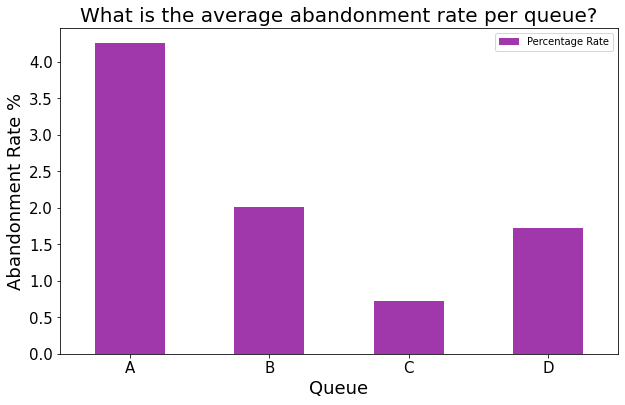

In [26]:
# Creating a dictionary to find the average abandonment rate per queue (Number of abandoned calls/total calls)
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100

# Created dataframe from dictionary    
abandon_df = pd.DataFrame(abandonment_rates.items(), columns=['Queue', 'Percentage Rate'])

# Visualization code - added title, adjusted font size, changed color scheme, etc.
abandon_df.plot.bar(x='Queue', y='Percentage Rate',rot=0,
                    figsize=(10,6),
                   fontsize='15',
                   color = '#A037AA')
plt.xlabel('Queue',fontsize=18)
plt.ylabel('Abandonment Rate %',fontsize=18)
plt.title('What is the average abandonment rate per queue?', fontsize=20)
plt.show()

<br><br><br>
## What is the service level and average speed of answer per each rep in the North Branch?

### Visualization 2.1

To visualize the service level and average speed of each rep, I created 3 different types of plots. My first visualization is a **scatterplot with adjusted marker sizes and differentiating point colors** to represent which branch it is. With this plot I liked how I could see both the service level and the speed on just one graph - it’s a clean look. I also liked how how you could see a pattern: the higher the service level, the lower the speed of answer is. It’s also easy to identify if there are any outliers with a scatterplot.

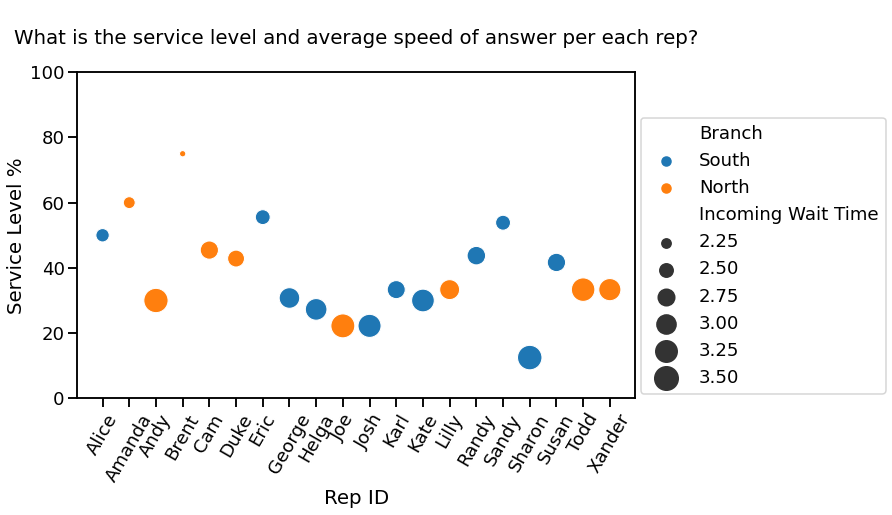

In [27]:
# company_wide_plt contains the data needed for the average speed of answer of each rep

company_wide_plt = df.groupby(["Rep ID","Branch"])["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls","Branch"]]
quick_stats = quick_reps.groupby(["Rep ID","Branch"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls","Branch"]]     
total_stats = rep_calls.groupby(["Rep ID","Branch"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Created Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Merging the company_wide_plt and service_level dataframes. Removing unnecessary columns.
rep_levels = pd.merge(company_wide_plt, service_level, on="Rep ID").drop(columns=['Calls_x', 'Calls_y'])


# Using seaborn to plot the data on a scatterplot using the dataframe 'rep_levels'
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Rep ID", 
                y="Service Level %",
                size="Incoming Wait Time",
                sizes=(40,600),
                hue='Branch',
                data=rep_levels).set(title='\nWhat is the service level and average speed of answer per each rep?\n')
locs, labels = plt.xticks()
plt.setp(labels, rotation=60) #rotated x-axis tick labels so the rep ID names don't overlap
plt.legend(bbox_to_anchor=(1.01, 0.86),borderaxespad=0)
plt.ylim(0,100) #adjusted min and max y-axis values to 0-100%
plt.show()

<br>

### Visualization 2.2

Although the scatterplot was good, I decided to make another plot to visualize the service level and average speed of each rep. Some of the marker sizes looked like the same size when it wasn’t, so it made it harder to differentiate the average speed of answer. In case someone wanted to see a more accurate differentiation between the points, I created **two bar plots using subplots**. It’s straight forward and you can clearly see the bar height difference and compare the reps.

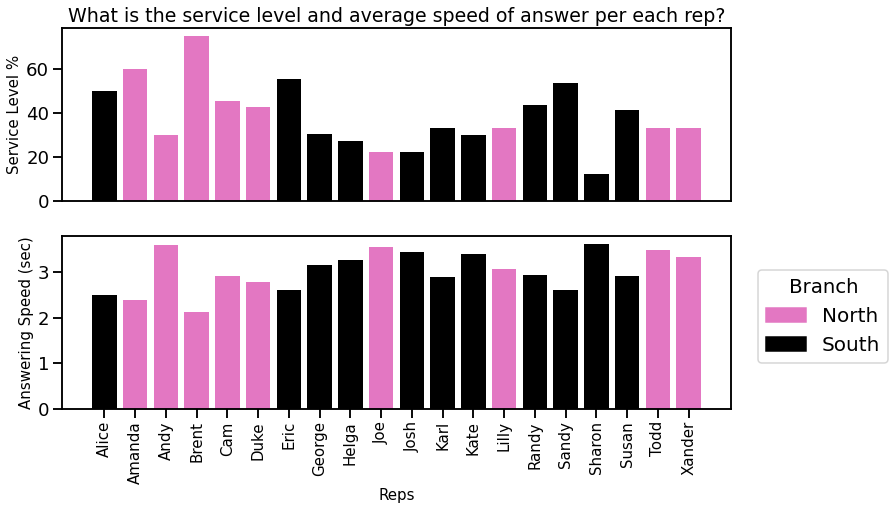

In [28]:
x = range(20) # specifying the range - total number of reps from both the North and South branch
plt.figure(figsize=(12,7)) # choosing plot size

# Choosing the colors I will use on my plot
colors = {'North':'tab:pink', 'South':'black'}  
c = rep_levels['Branch'].apply(lambda x: colors[x])
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

# The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,1,1)

# This will create the bar graph for Service Level Percentage
sl = plt.bar(x, rep_levels['Service Level %'],color=c, label=colors)
plt.ylabel('Service Level %',fontsize=15)
plt.xticks([],[])
plt.title('What is the service level and average speed of answer per each rep?',fontsize=19)


# This will create the bar graph for Average Incoming Wait Time:
plt.subplot(2,1,2)
iwt=plt.bar(x, rep_levels['Incoming Wait Time'],color=c, label=colors)
plt.ylabel('Answering Speed (sec)',fontsize=15)
plt.xlabel('Reps',fontsize=15)
plt.xticks(x, rep_levels['Rep ID'], rotation='vertical',fontsize=15)

# Legend feautures
plt.legend(handles, labels,title='Branch',fontsize=20,bbox_to_anchor=(1.04, 0.8),borderaxespad=0)
plt.show()

<br>

### Visualization 2.3

I created another plot (**Relplot**) to see the same data from another angle. The relplots make it easier to see a trend in the points and you could see both the North and South Branch data points separately in two different plots. It’s easy to grasp the information this way. (Another reason why I created this plot was because I wanted to practice coding different types of plots.)

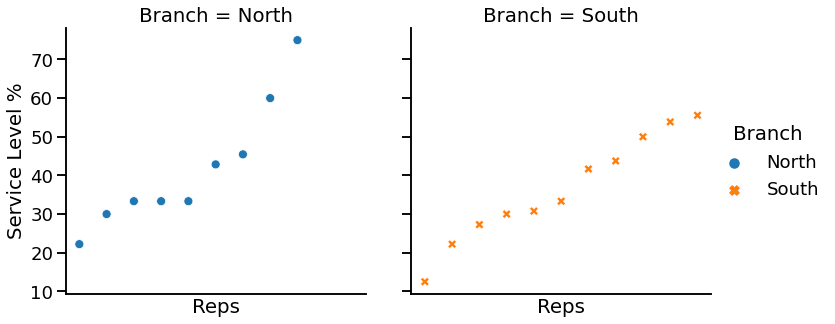

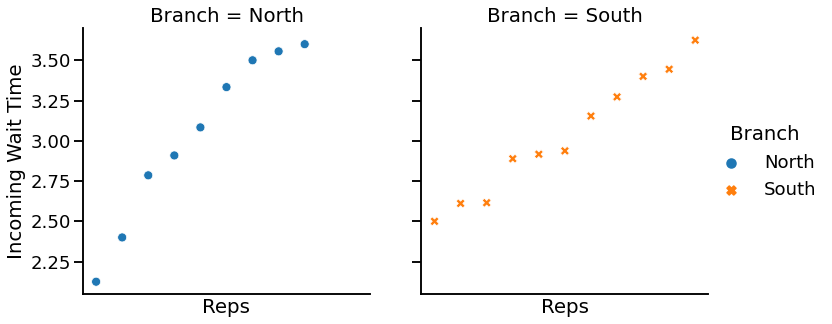

In [29]:
#Sorting the Rep Levels into two dataframes and sorting the order by Service Level and Incoming Wait Time
#The sorting will help me with my relplot visualization
rep_levels_service = rep_levels.sort_values(["Service Level %"])
rep_levels_incoming_wait = rep_levels.sort_values(["Incoming Wait Time"])

# First Relplot
branch_order = ['North', 'South'] #it was plotting the south branch first so I specified the order
chart_1 = sns.relplot(
    data=rep_levels_service, x="Rep ID", y="Service Level %",hue='Branch',
    col="Branch", style="Branch", hue_order=branch_order,col_order = branch_order, style_order=branch_order,
    kind="scatter")
chart_1.set(xlabel='Reps') #renaming x-axis
chart_1.set(xticks=[]) #removing x-axis tick labels
plt.show()

# Second Relplot
chart_2 = sns.relplot(
    data=rep_levels_incoming_wait, x="Rep ID", y="Incoming Wait Time",hue='Branch',
    col="Branch", style="Branch",
    kind="scatter")
chart_2.set(xlabel='Reps') #renaming x-axis
chart_2.set(xticks=[]) #removing x-axis tick labels
plt.show()

<br><br><br>
## For each type of call purpose, how many calls are outgoing vs. incoming?

### Visualization 3

To visualize the number of outgoing and incoming calls for each call purpose, I created a **grouped bar plot**. It’s super easy to read and understand the plot -  and you can see which complaint has the most number of calls and whether there is more incoming or outgoing calls per complaint. The bars are also color-coded based on whether it is incoming or outgoing. 

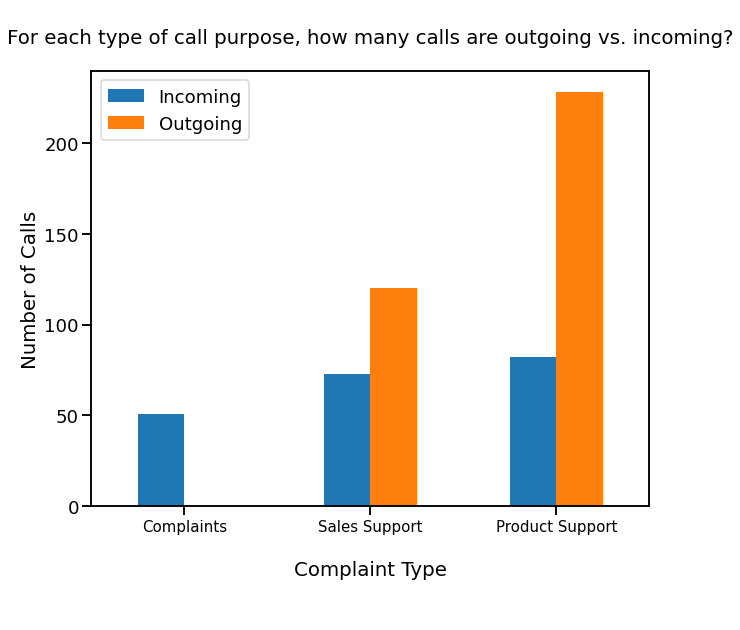

In [30]:
# Visualization 3

# Three dictionaries (complaints, sales_support and product_support) contain Incoming/Outgoing counts:
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Creating a nested dictionary to store number of Incoming and Outgoing calls for each Call Purpose:
call_purpose = {'Complaints':complaints,'Sales Support':sales_support,'Product Support':product_support}

# Creating a new dataframe 'Call_df' from the nested dictionary 
call_df = pd.DataFrame(call_purpose)

# Creating Double Bar Graph from the 'Call_df' dataframe
# Added some text for labels, title and custom x-axis tick edits, etc.
call_df.transpose().plot.bar(title='\nFor each type of call purpose, how many calls are outgoing vs. incoming?\n',
                            ylabel='Number of Calls',xlabel='\nComplaint Type\n\n',figsize=(10,8))
plt.xticks(rotation=0,fontsize=15)
plt.show()

In [31]:
# Creating a table that includes the average KPI's for each branch
rep_average_levels = rep_levels.groupby(['Branch']).mean()
rep_average_levels['Abandonment Rate'] = branch_df['Abandonment Rate']
rep_average_levels

,Incoming Wait Time,Service Level %,Abandonment Rate
Branch,,,
North,3.032447,41.725990,0.028807
South,3.033234,36.446899,0.012862


<br><br>
## Summary of Analysis

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
<br />**When considering the KPIs (average abandonment rate, service level, average speed of answer), out of the two branches it seems like the North Branch is operating more effeciently. The average speed of answer for both branches are approximately the same: 3.03 seconds. But the Norths' average Service Level % is higher (41.7%) and the average Abandonment Rate is 2.8% (within the optimal range of 2-5%). This is also keeping in consideration that the North has less employees compared to the South (9 reps vs 11 reps). Even though one may argue that the North gets fewer calls - when you take the average number of calls each rep receives per Branch, they're about the same (North - 27 calls/rep vs South - 28 calls/rep). So based on the KPI's it seems like the North is operating productively.**<br /><br />


2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
<br />**Subectively, it was interpreted that the North is operating productively - so it would seem like the South branch would benefit from the extra help. One argument could be that there seems to be some outliers in the North Branch. For example, Brent's Service Level is much higher than the average. But even if we remove Brent's score from the average, the North's average will be 37.6% - which is still higher than the average Service Level for the South (36.4%). So the South branch would need the extra help. Since five reps may be hired, maybe all 5 don't have to work for the South branch. Three reps could work for the South Branch and two in the North so it'll be a balance.**<br /><br />

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
<br />**Years of experience for each representative, the timeframe for the given dataset (it is just a days worth of data or a week) - I would want a larger data set. Is this the actual total number of reps that work on an average day? Are any KPI's affected dramatically during lunch hours?**<br /><br /> 

<br> 

## For each call purpose, how many calls (incoming and outgoing) take place in each time block?
### Visualization 4

To visualize the number of calls for each time block, I created another **grouped bar plot**. 

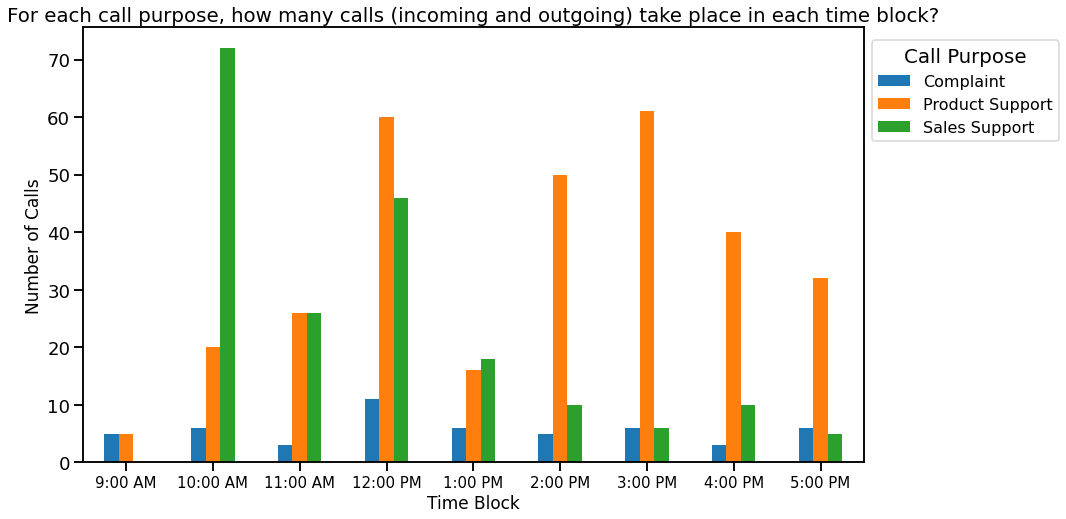

In [32]:
# Used groupby and pivot to plot based on time blocks:
time_group = df.groupby(["Time Block","Call Purpose"])['Calls'].sum().reset_index()
time_matrix = time_group.pivot("Time Block", "Call Purpose", "Calls")

# It was plotting the times out of order so I created a chronological list to specify the correct order
time_order = ['9:00 AM','10:00 AM','11:00 AM','12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM']

# Plotting grouped bar graph
time_matrix.loc[time_order].plot(kind='bar',figsize=(14,8))
plt.xlabel('Time Block', fontsize=17)
plt.ylabel('Number of Calls',fontsize=17)
plt.title('For each call purpose, how many calls (incoming and outgoing) take place in each time block?')
plt.xticks(rotation=0,fontsize=15)
plt.legend(title='Call Purpose',fontsize=16,bbox_to_anchor=(1.25, .97),borderaxespad=0)
plt.show()